In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
df_iris=pd.read_csv('Iris.csv')
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
df_iris.drop('Id',axis=1,inplace=True)
df_split=df_iris['Species'].str.rsplit('-',expand=True)
df_iris.drop('Species',axis=1,inplace=True)
df_iris['Species']=df_split.iloc[:,-1]
df_iris.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [22]:
df_labels=df_iris['Species']
df_iris.drop('Species',axis=1,inplace=True)

In [23]:
from sklearn.cluster import KMeans

In [24]:
wcss=[]
clusters=np.arange(1,16)
X=df_iris.values
for i in range(1,16):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

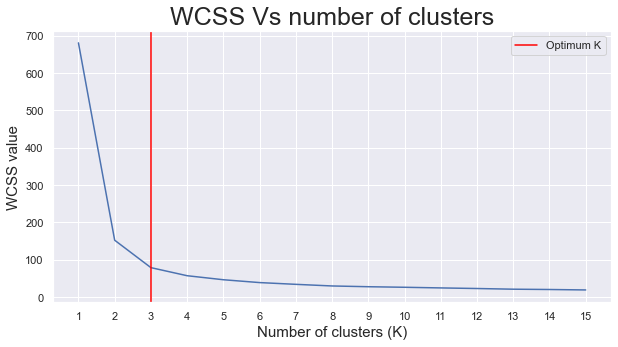

In [11]:
sns.set()
plt.figure(figsize=(10,5))
plt.title('WCSS Vs number of clusters',size=25)
plt.plot(clusters,wcss)
plt.axvline(3,color='red',label='Optimum K')
plt.xticks(np.arange(1,16))
plt.xlabel('Number of clusters (K)',size=15)
plt.ylabel('WCSS value',size=15)
plt.legend()

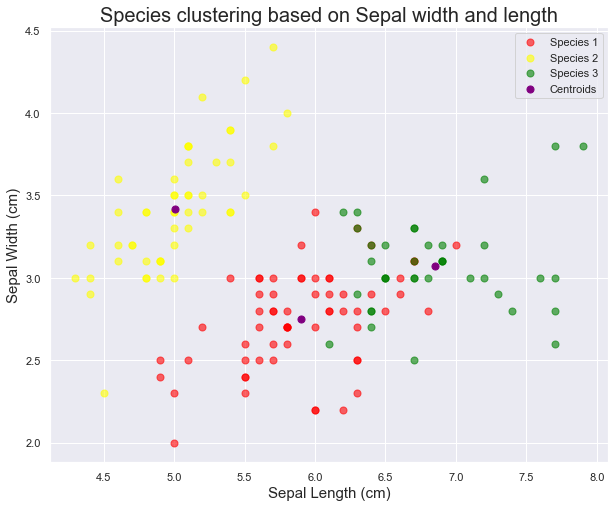

In [12]:
K=3
kmeans=KMeans(n_clusters=K)
kmeans.fit(X)
labels=kmeans.predict(X)
df_iris['Label']=labels

df_a=df_iris[df_iris['Label']==0]
df_b=df_iris[df_iris['Label']==1]
df_c=df_iris[df_iris['Label']==2]

plt.figure(figsize=(10,8))
plt.title('Species clustering based on Sepal width and length',size=20)

plt.scatter(df_a.iloc[:,0],df_a.iloc[:,1],c='red',s=50,alpha=0.6,label='Species 1')
plt.scatter(df_b.iloc[:,0],df_b.iloc[:,1],c='yellow',s=50,alpha=0.6,label='Species 2')
plt.scatter(df_c.iloc[:,0],df_c.iloc[:,1],c='green',s=50,alpha=0.6,label='Species 3')

plt.xlabel('Sepal Length (cm)',size=15)
plt.ylabel('Sepal Width (cm)',size=15)


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 50, c = 'purple', label = 'Centroids')



plt.legend()

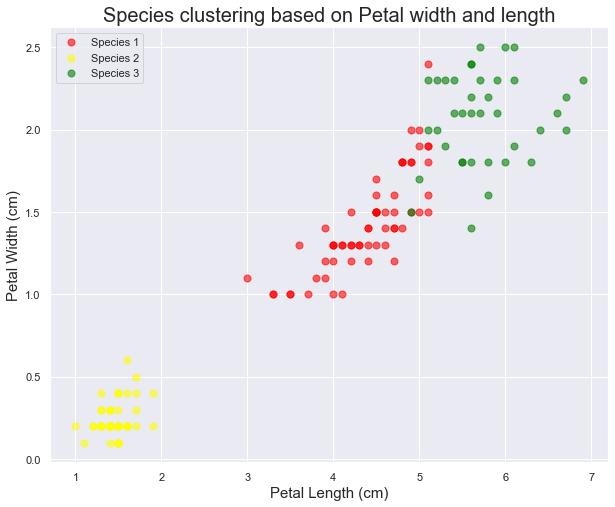

In [13]:
plt.figure(figsize=(10,8))
plt.title('Species clustering based on Petal width and length',size=20)

plt.scatter(df_a.iloc[:,2],df_a.iloc[:,3],c='red',s=50,alpha=0.6,label='Species 1')
plt.scatter(df_b.iloc[:,2],df_b.iloc[:,3],c='yellow',s=50,alpha=0.6,label='Species 2')
plt.scatter(df_c.iloc[:,2],df_c.iloc[:,3],c='green',s=50,alpha=0.6,label='Species 3')

plt.xlabel('Petal Length (cm)',size=15)
plt.ylabel('Petal Width (cm)',size=15)

plt.legend()

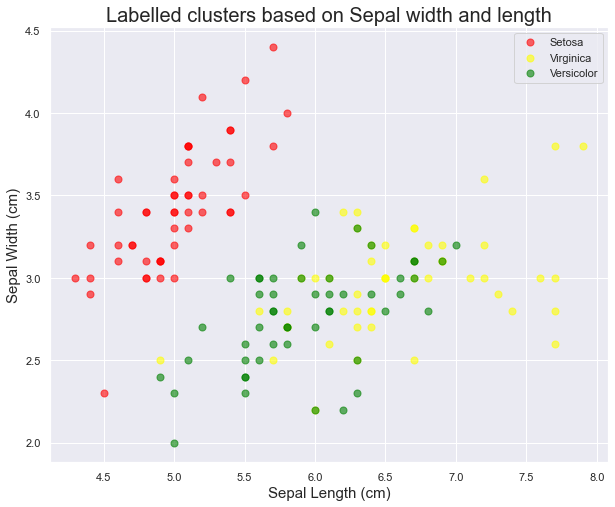

In [15]:
df_iris['Species']=df_labels
df_setosa=df_iris[df_iris['Species']=='setosa']
df_virginica=df_iris[df_iris['Species']=='virginica']
df_versicolor=df_iris[df_iris['Species']=='versicolor']




plt.figure(figsize=(10,8))
plt.title('Labelled clusters based on Sepal width and length',size=20)

plt.scatter(df_setosa.iloc[:,0],df_setosa.iloc[:,1],c='red',s=50,alpha=0.6,label='Setosa')
plt.scatter(df_virginica.iloc[:,0],df_virginica.iloc[:,1],c='yellow',s=50,alpha=0.6,label='Virginica')
plt.scatter(df_versicolor.iloc[:,0],df_versicolor.iloc[:,1],c='green',s=50,alpha=0.6,label='Versicolor')

plt.xlabel('Sepal Length (cm)',size=15)
plt.ylabel('Sepal Width (cm)',size=15)

plt.legend()

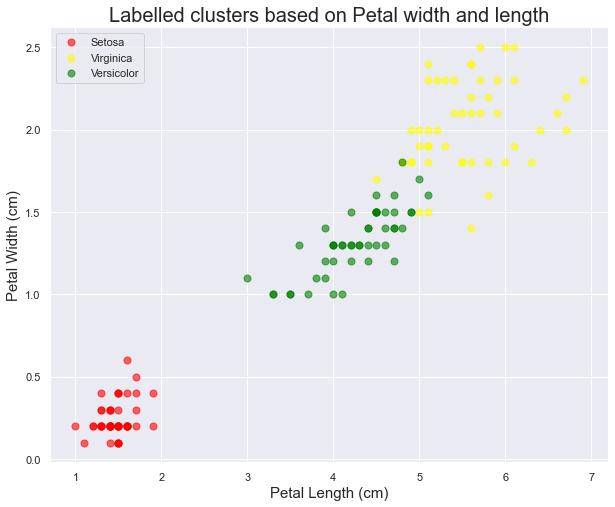

In [16]:
plt.figure(figsize=(10,8))
plt.title('Labelled clusters based on Petal width and length',size=20)

plt.scatter(df_setosa.iloc[:,2],df_setosa.iloc[:,3],c='red',s=50,alpha=0.6,label='Setosa')
plt.scatter(df_virginica.iloc[:,2],df_virginica.iloc[:,3],c='yellow',s=50,alpha=0.6,label='Virginica')
plt.scatter(df_versicolor.iloc[:,2],df_versicolor.iloc[:,3],c='green',s=50,alpha=0.6,label='Versicolor')

plt.xlabel('Petal Length (cm)',size=15)
plt.ylabel('Petal Width (cm)',size=15)

plt.legend()

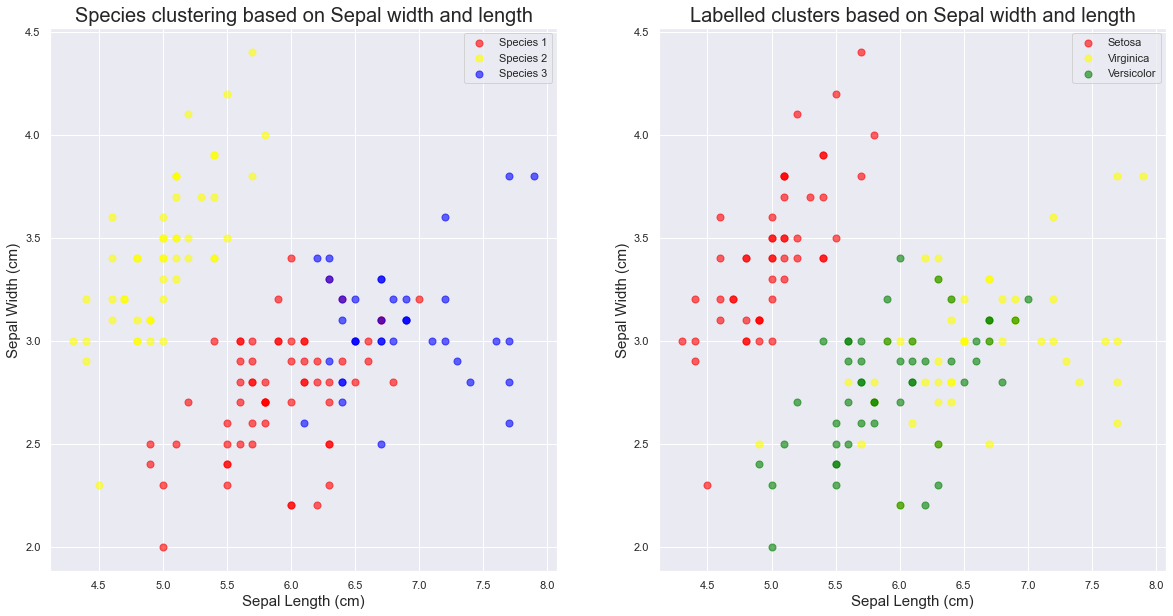

In [17]:
fig=plt.figure(figsize=(20,10))

ax1=fig.add_subplot(121)

ax1.set_title('Species clustering based on Sepal width and length',size=20)

ax1.scatter(df_a.iloc[:,0],df_a.iloc[:,1],c='red',s=50,alpha=0.6,label='Species 1')
ax1.scatter(df_b.iloc[:,0],df_b.iloc[:,1],c='yellow',s=50,alpha=0.6,label='Species 2')
ax1.scatter(df_c.iloc[:,0],df_c.iloc[:,1],c='blue',s=50,alpha=0.6,label='Species 3')

ax1.set_xlabel('Sepal Length (cm)',size=15)
ax1.set_ylabel('Sepal Width (cm)',size=15)

ax1.legend()


ax2=fig.add_subplot(122)
ax2.set_title('Labelled clusters based on Sepal width and length',size=20)

ax2.scatter(df_setosa.iloc[:,0],df_setosa.iloc[:,1],c='red',s=50,alpha=0.6,label='Setosa')
ax2.scatter(df_virginica.iloc[:,0],df_virginica.iloc[:,1],c='yellow',s=50,alpha=0.6,label='Virginica')
ax2.scatter(df_versicolor.iloc[:,0],df_versicolor.iloc[:,1],c='green',s=50,alpha=0.6,label='Versicolor')

ax2.set_xlabel('Sepal Length (cm)',size=15)
ax2.set_ylabel('Sepal Width (cm)',size=15)

ax2.legend()

## As confirmed already, on the left, we have the KMeans unsupervised learning results while on the right, we have the actual labelled flowers. We can see that there is an extreme degree of similarity between the two graphs. This means a K=3 cluster performed really well for our unsupervised classification.

